<a href="https://colab.research.google.com/github/KenDaupsey/Semi-Parametric-Survival-Analysis-Cox-Proportional-Hazards-Model-/blob/main/Semi_Parametric_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Semi-Parametric Survival Analysis ***

*** Cox Proportional-Hazards Model ***

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
###Load Dataset
url = "https://raw.githubusercontent.com/KenDaupsey/Semi-Parametric-Survival-Analysis-Cox-Proportional-Hazards-Model-/main/Survival%7EDrug%7EUse%7ERelapse.csv"
df= pd.read_csv(url)
df.head()

,ID,age,ndrugtx,treat,site,time,censor,herco
0,1,39.0,1.0,1,0,188,1,3
1,2,33.0,8.0,1,0,26,1,3
2,3,33.0,3.0,1,0,207,1,2
3,4,32.0,1.0,0,0,144,1,3
4,5,24.0,5.0,1,0,551,0,2


In [26]:
df.columns

Index(['ID', 'age', 'ndrugtx', 'treat', 'site', 'time', 'censor', 'herco'], dtype='object')

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       628 non-null    int64  
 1   age      623 non-null    float64
 2   ndrugtx  611 non-null    float64
 3   treat    628 non-null    int64  
 4   site     628 non-null    int64  
 5   time     628 non-null    int64  
 6   censor   628 non-null    int64  
 7   herco    628 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 39.4 KB
None


In [28]:
df.kurtosis()

ID        -1.200000
age       -0.181020
ndrugtx    9.825970
treat     -2.004927
site      -1.172316
time      -0.092008
censor     0.482929
herco     -1.736870
dtype: float64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,628.0,314.500000,181.432265,1.0,157.75,314.5,471.25,628.0
age,623.0,32.369181,6.119534,20.0,27.00,32.0,37.00,56.0
ndrugtx,611.0,4.574468,5.494462,0.0,1.00,3.0,6.00,40.0
treat,628.0,0.490446,0.500307,0.0,0.00,0.0,1.00,1.0
site,628.0,0.292994,0.455498,0.0,0.00,0.0,1.00,1.0
time,628.0,234.703822,201.701126,2.0,79.00,166.0,365.25,1172.0
censor,628.0,0.808917,0.393468,0.0,1.00,1.0,1.00,1.0
herco,628.0,1.898089,0.899652,1.0,1.00,2.0,3.00,3.0


In [30]:
df.isnull().sum()

ID          0
age         5
ndrugtx    17
treat       0
site        0
time        0
censor      0
herco       0
dtype: int64

In [31]:
# Handle missing values of "ndrugtx"

df['ndrugtx'].fillna(df['ndrugtx'].median(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

In [32]:
df.isnull().sum()

ID         0
age        0
ndrugtx    0
treat      0
site       0
time       0
censor     0
herco      0
dtype: int64

In [33]:
### Install Library for Survival Analysis Procedure
#! pip install lifelines

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
ID        -0.000135   0.999865  0.000402       -0.000922        0.000653   
age       -0.021969   0.978270  0.007467       -0.036604       -0.007335   
ndrugtx    0.035766   1.036413  0.007650        0.020772        0.050760   
treat     -0.265095   0.767133  0.089721       -0.440944       -0.089245   
site      -0.144561   0.865402  0.160440       -0.459019        0.169896   
herco      0.067183   1.069491  0.049775       -0.030374        0.164740   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
ID                    0.999078             1.000653     0.0 -0.335464   
age                   0.964058             0.992692     0.0 -2.942295   
ndrugtx               1.020989             1.052070     0.0  4.675143   
treat                 0.64

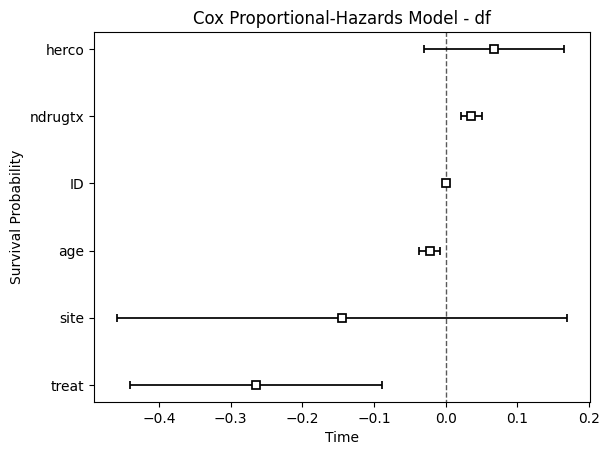

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

# Create and fit the Cox Proportional-Hazards model
cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='censor')

# Print summary of the model
print(cph.summary)

# Access hazard ratios
print(cph.hazard_ratios_)

# Plotting survival curves
cph.plot()
plt.title('Cox Proportional-Hazards Model - df')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

# *** Semi-Parametric Survival Analysis ***

*** Cox Proportional-Hazards Model ***

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
###Load Dataset
url = "https://raw.githubusercontent.com/KenDaupsey/Non-Parametric-Survival-Analysis-2-Log-Rank-Non-Parametric-Survival-Analysis-Test-/main/Survival%7EDrug%7EUse%7ERelapse.csv"
df= pd.read_csv(url)
df.head()

,ID,age,ndrugtx,treat,site,time,censor,herco
0,1,39.0,1.0,1,0,188,1,3
1,2,33.0,8.0,1,0,26,1,3
2,3,33.0,3.0,1,0,207,1,2
3,4,32.0,1.0,0,0,144,1,3
4,5,24.0,5.0,1,0,551,0,2


In [37]:
df.columns

Index(['ID', 'age', 'ndrugtx', 'treat', 'site', 'time', 'censor', 'herco'], dtype='object')

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       628 non-null    int64  
 1   age      623 non-null    float64
 2   ndrugtx  611 non-null    float64
 3   treat    628 non-null    int64  
 4   site     628 non-null    int64  
 5   time     628 non-null    int64  
 6   censor   628 non-null    int64  
 7   herco    628 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 39.4 KB
None


In [39]:
df.kurtosis()

ID        -1.200000
age       -0.181020
ndrugtx    9.825970
treat     -2.004927
site      -1.172316
time      -0.092008
censor     0.482929
herco     -1.736870
dtype: float64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,628.0,314.500000,181.432265,1.0,157.75,314.5,471.25,628.0
age,623.0,32.369181,6.119534,20.0,27.00,32.0,37.00,56.0
ndrugtx,611.0,4.574468,5.494462,0.0,1.00,3.0,6.00,40.0
treat,628.0,0.490446,0.500307,0.0,0.00,0.0,1.00,1.0
site,628.0,0.292994,0.455498,0.0,0.00,0.0,1.00,1.0
time,628.0,234.703822,201.701126,2.0,79.00,166.0,365.25,1172.0
censor,628.0,0.808917,0.393468,0.0,1.00,1.0,1.00,1.0
herco,628.0,1.898089,0.899652,1.0,1.00,2.0,3.00,3.0


In [41]:
df.isnull().sum()

ID          0
age         5
ndrugtx    17
treat       0
site        0
time        0
censor      0
herco       0
dtype: int64

In [42]:
# Handle missing values of "ndrugtx"

df['ndrugtx'].fillna(df['ndrugtx'].median(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

In [43]:
df.isnull().sum()

ID         0
age        0
ndrugtx    0
treat      0
site       0
time       0
censor     0
herco      0
dtype: int64

In [44]:
### Install Library for Survival Analysis Procedure
#! pip install lifelines

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
ID        -0.000135   0.999865  0.000402       -0.000922        0.000653   
age       -0.021969   0.978270  0.007467       -0.036604       -0.007335   
ndrugtx    0.035766   1.036413  0.007650        0.020772        0.050760   
treat     -0.265095   0.767133  0.089721       -0.440944       -0.089245   
site      -0.144561   0.865402  0.160440       -0.459019        0.169896   
herco      0.067183   1.069491  0.049775       -0.030374        0.164740   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
ID                    0.999078             1.000653     0.0 -0.335464   
age                   0.964058             0.992692     0.0 -2.942295   
ndrugtx               1.020989             1.052070     0.0  4.675143   
treat                 0.64

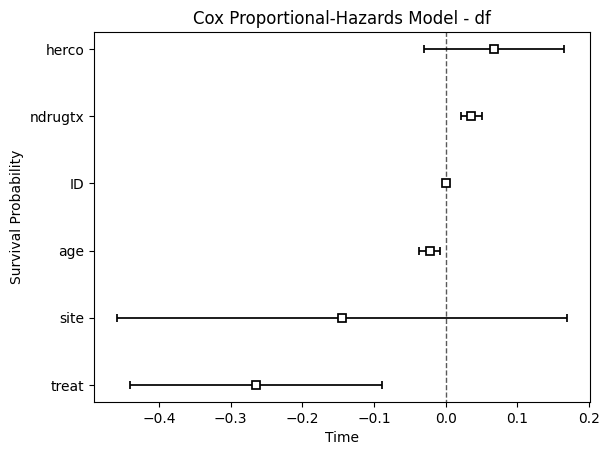

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

# Create and fit the Cox Proportional-Hazards model
cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='censor')

# Print summary of the model
print(cph.summary)

# Access hazard ratios
print(cph.hazard_ratios_)

# Plotting survival curves
cph.plot()
plt.title('Cox Proportional-Hazards Model - df')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()